AI Programming - SW Lee

# Lab 05: Sequence Model of GRU
## Exercise: Sentiment Analysis of Movie Reviews
This exercise is based on the notebook in TensorFlow Tutorials.<br>
https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [17]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import matplotlib.pyplot as plt

Loading IMDB standard dataset using the Keras dataset class.

num_words = 10000 signifies that only 10000 unique words will be taken for our dataset.

x_train, x_test: List of movie reviews text data. having an uneven length.

y_train, y_test: Lists of integer target labels (1 or 0).

In [18]:
#from keras.datasets import imdb
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews',
                                         split=['train', 'test'],  # + 'unsupervised'
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

print(ds_info.features)

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})


We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [19]:
X_train = []
y_train = []

X_test_str = []
y_test = []

#preparing datasets
for sentense, label in ds_train:
    X_train.append(sentense.numpy().decode('utf8'))
    y_train.append(label.numpy())

for sentense, label in ds_test:
    X_test_str.append(sentense.numpy().decode('utf8'))  # X_test_str is used at the test stage
    y_test.append(label.numpy())

y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
print(X_train[0])
print('The review is', 'Positive' if y_train[0]==1 else 'Negative')

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
The review is Negative


## Tokenizer and Integer encoding

In [21]:
# hyperparameter for word embeddings
vocab_size = 10000
embedding_size = 128
max_length = 300

### START CODE HERE ###

tokenizer = keras.layers.TextVectorization(max_tokens=vocab_size, output_sequence_length=max_length) # tokenizer for integer encoding

tokenizer.adapt(X_train) # adjust to train datasets

X_train = tokenizer(X_train) # tokenize train datasets
X_test = tokenizer(X_test_str) # tokenize test datasets

### END CODE HERE ###

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.
The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.
After the Embedding layer, we are adding Bi-directional LSTM units.
Using sigmoid activation and then compiling the model

In [22]:
hidden_states = 64
dropout_rate = 0.5

model = keras.Sequential() # initialize sequential model

### START CODE HERE ###

model.add(keras.layers.InputLayer(shape=(max_length,)))  # input layer
model.add(keras.layers.Embedding(vocab_size,embedding_size))  # embedding layer
model.add(keras.layers.Bidirectional(keras.layers.GRU(hidden_states)))  # bidirectional GRU
model.add(keras.layers.Dropout(dropout_rate))  # dropout
model.add(keras.layers.Dense(1,activation="sigmoid"))  # output layer

### END CODE HERE ###

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # compile model

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 300, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,354,625 (5.17 MB)

 Trainable params: 1,354,625 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

**Expected Model Summary**

```
┏--------------------------------------┳-----------------------------┳-----------------┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡--------------------------------------╇-----------------------------╇-----------------┩
│ embedding_1 (Embedding)              │ (None, 300, 128)            │       1,280,000 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└--------------------------------------┴-----------------------------┴-----------------┘
 Total params: 1,354,625 (5.17 MB)
 Trainable params: 1,354,625 (5.17 MB)
 Non-trainable params: 0 (0.00 B)
```


#### **\### Network Analysis Assignment \###**
Derive how above **Param #** can be achieved.
#### **\### End of Assignment \###**

In [23]:
n_batch = 64

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # prevent overfitting as too many epochs
mc = keras.callbacks.ModelCheckpoint('GRU_imdb.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) #save best state

results = model.fit(X_train, y_train,
            batch_size=n_batch,
            epochs=10,
            callbacks=[es, mc],
            validation_split=0.2)

print(results.history['loss'])
print(results.history['accuracy'])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5977 - loss: 0.6416
Epoch 1: val_accuracy improved from -inf to 0.80560, saving model to GRU_imdb.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5980 - loss: 0.6413 - val_accuracy: 0.8056 - val_loss: 0.4413
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8518 - loss: 0.3672
Epoch 2: val_accuracy did not improve from 0.80560
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8518 - loss: 0.3672 - val_accuracy: 0.7468 - val_loss: 0.5063
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8973 - loss: 0.2705
Epoch 3: val_accuracy improved from 0.80560 to 0.86300, saving model to GRU_imdb.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8973 - loss: 0.2704 - val_accuracy: 0.8630 - val_loss: 0.3401
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9429 - loss: 0.1673
Epoch 4: val_accuracy improved from 0.86300 to 0.86820, saving model to G

Plot Convergence Graph

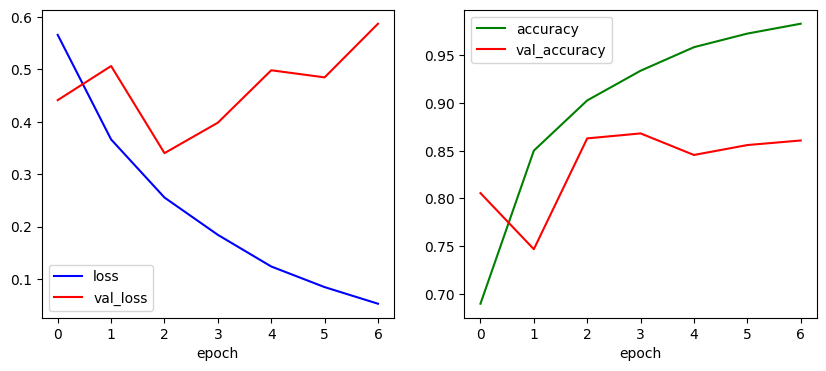

In [24]:
# plot loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(results.history['loss'], 'b-', label='loss')
plt.plot(results.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(results.history['accuracy'], 'g-', label='accuracy')
plt.plot(results.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

Evaluate the model

In [25]:
# model = keras.models.load_model('GRU_imdb.keras')
model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8365 - loss: 0.6809


[0.6736342906951904, 0.8377599716186523]

### Test Model with a random review

In [27]:
idx = np.random.randint(X_test.shape[0]) #create random index

X_input = tf.reshape(X_test[idx], shape=(1,-1)) #pick one random sampling in test datasets

score = float(tf.squeeze(model.predict(X_input))) #save model's predict score

decision = 1 if score>0.5 else 0
rate = score if decision==1 else (1-score) # Above 0.5, use the score as is, below use 1-score.

print(X_test_str[idx])

print('The review is', 'Positive' if decision==1 else 'Negative', 'in {:.2f}% '.format(rate*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The bearings of western-style Feminism on the various subcultures of India have hitherto remained largely non-existent, the two entities belonging to alien realms and threatening (in the name of tradition) never to coincide. Art imitates life (or so the claim goes) and popular Hindi cinema is no exception, reflecting an underlying misogyny which, regrettably, forms the foundation of much of the collective Indian culture. But why? What is it about the female gender that has rendered it so hateful to the culture that women are routinely subject to the most unimaginable horrors, including rape, murder, infanticide, imposed illiteracy, infidelity, and the subjugation of spirit that goes under the name of 'dowry'? Rajkumar Santoshi's latest offering, "Lajja", asks the same plaintive question, linking the atrocities committed against women through three separate chapters/episodes which comprise the journey of shame endured by its protagonist, Vaidehi (Ma

(c) 2024 SW Lee